<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Asian Restaurants of PA Neighborhoods</font></h1>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [149]:
!pip install lxml
!pip install cssselect
!pip install requests
!pip install jupyter
!pip install BeautifulSoup4

import numpy as np
import pandas as pd
import requests
import lxml.html as lh

from urllib.request import urlopen
from bs4 import BeautifulSoup

!conda install -c conda-forge folium=0.5.0 --yes
import folium
import json # or import geojson
print('Folium installed and imported!')

from IPython.display import HTML

import matplotlib.pyplot as plt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed and imported!


<h1 align=center><font size = 5>Methodology Highlights:</font></h1>

In this analysis, we shall take different counties in Pennsylvania and to categorically segment its neighborhoods into major clusters and examine their Asian cuisines. The intention is to examine the  neighborhood cluster's 

Undoubtedly, Food Diversity is an important part of an ethnically diverse metropolis. The idea of this project is to categorically segment the neighborhoods of Pennsylvania into major clusters and examine their cuisines. A desirable intention is to examine the neighborhood cluster’s food habits and taste. Further examination might reveal if food has any relationship with the diversity of a neighborhood. This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering' unsupervised machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood.

Import the Pennsylvania population and projection information map from https://harrisburg.psu.edu/

Import GEOJSON file for the different counties at pennsylvania from https://www.pasda.psu.edu/

Mark those counties in the pennsylvania map

Fetch the availabilities of different restaurants using foursquare API

Analyze different cuisines available in the counties and derive the relationship with the population ethinicity.

<a id='item1'></a>

In [225]:
# Import the population dataset of PA counties
df_PA = pd.read_csv("PA_Counties_Population.csv")
print('Data downloaded!')

Data downloaded!


In [223]:
df_PA

,ID,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,LONGITUDE,LATITUDE
0,0,42001,Adams,101407,94979,1561,213,746,20,2544,1344,-77.239596,39.870897
1,1,42003,Allegheny,1223348,997295,161861,1702,34090,278,5523,22599,-79.976040,40.459720
2,2,42005,Armstrong,68941,67565,553,45,150,9,91,528,-79.468983,40.787624
3,3,42007,Beaver,170539,155561,10676,181,724,40,403,2954,-80.371000,40.691662
4,4,42009,Bedford,49762,48782,238,75,101,14,151,401,-78.523745,40.027145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,62,42127,Wayne,52822,49759,1644,101,255,4,460,599,-75.304510,41.626441
63,63,42129,Westmoreland,365169,348182,8562,351,2704,62,833,4475,-79.487320,40.293016
64,64,42131,Wyoming,28276,27545,208,54,95,3,112,259,-76.019111,41.517910
65,65,42133,York,434972,385135,24344,942,5407,123,10326,8695,-76.700895,39.906750


In [152]:
df_PA.dtypes

ID                                        int64
FIPS                                      int64
AREA                                     object
TOTAL POPULATION                          int64
WHITE                                     int64
AFRICAN AMERICAN                          int64
AMERICAN INDIAN AND ALASKA NATIVE         int64
ASIAN                                     int64
NATIVE HAWAIIAN AND PACIFIC ISLANDER      int64
OTHERS                                    int64
TWO OR MORE RACES                         int64
LONGITUDE                               float64
LATITUDE                                float64
dtype: object

<h1 align=left><font size = 3>Plot ASIAN population distribution across counties</font></h1>

In [153]:
df_PA[['ID', 'FIPS', 'AREA','ASIAN']]

,ID,FIPS,AREA,ASIAN
0,0,42001,Adams,746
1,1,42003,Allegheny,34090
2,2,42005,Armstrong,150
3,3,42007,Beaver,724
4,4,42009,Bedford,101
...,...,...,...,...
62,62,42127,Wayne,255
63,63,42129,Westmoreland,2704
64,64,42131,Wyoming,95
65,65,42133,York,5407


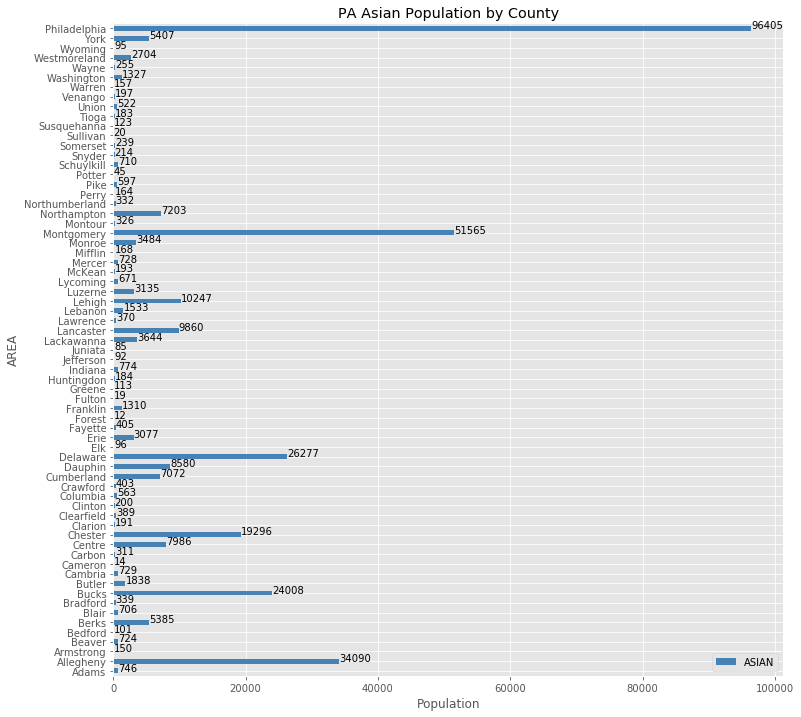

In [228]:
# plot Asian population by county
df_PA[['AREA','ASIAN']].plot(kind='barh', x='AREA', y='ASIAN', figsize=(12, 12), color='steelblue')
plt.xlabel('Population')
plt.title('PA Asian Population by County')


for index, value in enumerate(df_PA['ASIAN']):
    plt.text(value, index, str(value))
    
plt.show()

In [155]:
!pip install geocoder

In [156]:
import geocoder # import geocoder
print('done')

done


In [157]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



<h1 align=left><font size = 3>Four Square API credentials to get county latitue and longitudes</font></h1>

In [158]:
CLIENT_ID = '3BVFVQREKYPLB2OABFS4KBOL1JMEKKT1AUHFO0OYSYRRK34L' # your Foursquare ID
CLIENT_SECRET = 'FUWDS21JVXDEDQM0P1L0LMMNDPSWAS41YACVRQAG1DJR1J3D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
CATEGORYID = '4bf58dd8d48988d10f941735'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3BVFVQREKYPLB2OABFS4KBOL1JMEKKT1AUHFO0OYSYRRK34L
CLIENT_SECRET:FUWDS21JVXDEDQM0P1L0LMMNDPSWAS41YACVRQAG1DJR1J3D


In [159]:
latitude = 39.870897
longitude = 77.239596
radius=50
LIMIT=10
categoryId = '4bf58dd8d48988d10f941735'

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL
results = requests.get(url).json()

display(url)
results

'https://api.foursquare.com/v2/venues/search?&client_id=3BVFVQREKYPLB2OABFS4KBOL1JMEKKT1AUHFO0OYSYRRK34L&client_secret=FUWDS21JVXDEDQM0P1L0LMMNDPSWAS41YACVRQAG1DJR1J3D&v=20180605&ll=39.870897,77.239596&radius=50&categoryId=4bf58dd8d48988d10f941735&limit=10'

{'meta': {'code': 200, 'requestId': '5e5d9b270de0d9001b22cf52'},
 'response': {'venues': []}}

In [160]:
df_PA.shape

(67, 13)

In [161]:
for ind in df_PA.index:
    address = df_PA['AREA'][ind] + ', Pennsylvania, US'
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    df_PA['LATITUDE'][ind] = location.latitude
    df_PA['LONGITUDE'][ind] = location.longitude

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [162]:
latitude = df_PA.loc[0, 'LATITUDE'] 
print(latitude)

39.8708972


#### Define Foursquare Credentials and Version

In [163]:
CLIENT_ID = '3BVFVQREKYPLB2OABFS4KBOL1JMEKKT1AUHFO0OYSYRRK34L' # your Foursquare ID
CLIENT_SECRET = 'FUWDS21JVXDEDQM0P1L0LMMNDPSWAS41YACVRQAG1DJR1J3D' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3BVFVQREKYPLB2OABFS4KBOL1JMEKKT1AUHFO0OYSYRRK34L
CLIENT_SECRET:FUWDS21JVXDEDQM0P1L0LMMNDPSWAS41YACVRQAG1DJR1J3D


#### Now, let's get the top 100 venues that are in the Beaches within a radius of 500 meters.

In [164]:
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [165]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## 2. Explore Neighborhoods in Pennsylvania
#### Let's create a function to repeat the same process to all the neighborhoods in Pennsylvania

In [166]:
def getNearbyRestaurants(names, latitudes, longitudes):
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        # create the API request URL
    
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            CAT_IDS,
            LIMIT)
        
        #print(url)
        
        # make the GET request
        results1 = requests.get(url).json()['response']['venues']
            
        if len(results1) != 0:
            #print("The results1 is not empty")
            x=0
            for data in results1:
                #print(data)
                Neigh     = name
                Neigh_Lat = lat
                Neigh_Lng = lng
                Venue_Id  = results1[x]['id']
                Venue_Name = results1[x]['name']
                Venue_Lat = results1[x]['location']['lat'] 
                Venue_Long = results1[x]['location']['lng'] 
                
                try:
                    Venue_City = results1[x]['location']['city']
                except KeyError:
                    Venue_City = ''
                    
                Venue_Cat_Id = results1[x]['categories'][0]['id']
                Venue_Cat_Name = results1[x]['categories'][0]['name']   
                
                #print(x)
                x=x+1

                venues_list.append([(Neigh,
                                     Neigh_Lat,
                                     Neigh_Lng,
                                     Venue_Id,
                                     Venue_Name,
                                     Venue_Lat,
                                     Venue_Long,
                                     Venue_City,
                                     Venue_Cat_Id,
                                     Venue_Cat_Name)])

   
                nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
                nearby_venues.columns = ['Neighborhood', 
                                         'Neighborhood_Latitude', 
                                         'Neighborhood_Longitude', 
                                         'Venue_Id',
                                         'Venue', 
                                         'Venue_Latitude', 
                                         'Venue_Longitude', 
                                         'Venue_City',
                                         'Venue_Category_ID',
                                         'Venue_Category_Name']
    #print(x)
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe for indian and asian restaurants

In [167]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 20000 # define radius
#CAT_IDS = "4bf58dd8d48988d142941735,4bf58dd8d48988d10f941735"  #asian, indian
CAT_IDS = "4bf58dd8d48988d142941735"  #asian

PA_venues = getNearbyRestaurants(names=df_PA['AREA'],
                                 latitudes=df_PA['LATITUDE'],
                                 longitudes=df_PA['LONGITUDE']
                                  )

CAT_IDS = "4bf58dd8d48988d10f941735"  #indian

PA_venues1 = getNearbyRestaurants(names=df_PA['AREA'],
                                 latitudes=df_PA['LATITUDE'],
                                 longitudes=df_PA['LONGITUDE']
                                  )

In [168]:
PA_venues.to_csv('output2.csv')
PA_venues1.to_csv('output3.csv')

<h1 align=left><font size = 3>Download the Geojson file and plot the PA counties.</font></h1>

In [231]:
# Assign PA json file downloaded from https://www.pasda.psu.edu/

PA_geo = r'PaCounty.json' # geojson file

# Assign PA latitudes and longitudes

latitude = 41.20
longitude = -77.19

# create a plain PA map
PA_map = folium.Map(location=[latitude, longitude], zoom_start=7)

# generate choropleth map using the total ASIAN population of each county in Pennsylvania
PA_map.choropleth(
    geo_data=PA_geo,
    data=df_PA, 
    columns=['ID', 'ASIAN'],
    key_on='id',
#    fill_color='YlOrRd', 
#    fill_color='RdYlGn',
    fill_color='BuPu',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='PA population'
)

# save map

PA_map.save(outfile= "test.html")

# display HTML map

from IPython.display import HTML
HTML('<iframe src=test.html width=1200 height=700></iframe>')

#### Populate ASIAN restaurants

In [232]:
# instantiate a feature group for the incidents in the dataframe
restaurants = folium.map.FeatureGroup()

# loop through the asian restaraunts and plot them on to the map
for lat, lng in zip(PA_venues.Venue_Latitude, PA_venues.Venue_Longitude):
    restaurants.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.2
        )
    )
          
# add incidents to map
PA_map.add_child(restaurants)

# instantiate a feature group for the incidents in the dataframe
restaurants1 = folium.map.FeatureGroup()

# loop through the indian restaraunts and plot them on to the map
for lat, lng in zip(PA_venues1.Venue_Latitude, PA_venues1.Venue_Longitude):
    restaurants1.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='Yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.2
        )
    )

# add incidents to map
PA_map.add_child(restaurants1)

PA_map.save(outfile= "test3.html")

from IPython.display import HTML
HTML('<iframe src=test3.html width=1200 height=700></iframe>')


#### Populate Indian Restaurants

In [230]:
# instantiate a feature group for the incidents in the dataframe
restaurants1 = folium.map.FeatureGroup()


# loop through the 100 crimes and add each to the incidents feature group
for lat, lng in zip(PA_venues1.Venue_Latitude, PA_venues1.Venue_Longitude):
    restaurants1.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='Yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.2
        )
    )
    
# add incidents to map
PA_map.add_child(restaurants1)

# display map
#PA_map

PA_map.save(outfile= "test3.html")

from IPython.display import HTML
HTML('<iframe src=test3.html width=1200 height=700></iframe>')


#### Let's find out how many unique categories can be curated from all the returned venues

In [238]:
df_merge = pd.concat([PA_venues1, PA_venues])
df_count=[df_merge['Neighborhood'].value_counts()]
#df_count['count'] = df_merge.groupby('Neighborhood')['Neighborhood'].transform('count')

df_count
#pd.options.display.max_rows

[Philadelphia    100
 Montgomery      100
 Delaware        100
 Allegheny        99
 Dauphin          75
                ... 
 Bedford           3
 Susquehanna       2
 Fulton            2
 Cameron           1
 Potter            1
 Name: Neighborhood, Length: 65, dtype: int64]

In [173]:
df_merge.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue_Id,Venue,Venue_Latitude,Venue_Longitude,Venue_City,Venue_Category_ID,Venue_Category_Name
0,Allegheny,40.45972,-79.97604,5c37fca73e6741002c3619a5,Masala House,40.455542,-79.943656,Pittsburgh,4bf58dd8d48988d10f941735,Indian Restaurant
1,Allegheny,40.45972,-79.97604,5a58ecad12f0a96c74b66b33,Choolaah Indian BBQ,40.460321,-79.923534,Pittsburgh,4bf58dd8d48988d10f941735,Indian Restaurant
2,Allegheny,40.45972,-79.97604,4ad61ffbf964a520390521e3,Udipi Cafe,40.443399,-79.790458,Monroeville,4bf58dd8d48988d10f941735,Indian Restaurant
3,Allegheny,40.45972,-79.97604,4b5e338ef964a5206d8329e3,Kohli's Indian Groceries,40.445130,-79.948601,Pittsburgh,4bf58dd8d48988d10f941735,Indian Restaurant
4,Allegheny,40.45972,-79.97604,4ad4c00ef964a52020ee20e3,Prince of India Restaurant,40.441633,-79.958575,Pittsburgh,4bf58dd8d48988d10f941735,Indian Restaurant


In [174]:

print('There are {} uniques categories.'.format(len(df_merge['Venue_Category_Name'].unique())))
df_merge.groupby('Venue_Category_Name')['Venue_Category_Name'].count().sort_values(ascending=False)


There are 55 uniques categories.


Venue_Category_Name
Chinese Restaurant               763
Indian Restaurant                307
Asian Restaurant                 228
Sushi Restaurant                 143
Japanese Restaurant              128
Thai Restaurant                   93
Vietnamese Restaurant             61
Noodle House                      42
Korean Restaurant                 22
Dim Sum Restaurant                14
Ramen Restaurant                  13
Szechuan Restaurant               11
South Indian Restaurant           10
Himalayan Restaurant               8
North Indian Restaurant            8
Taiwanese Restaurant               6
Malay Restaurant                   5
Food Truck                         5
Grocery Store                      5
Buffet                             4
Bar                                4
Filipino Restaurant                3
Italian Restaurant                 3
American Restaurant                3
Food Court                         2
Restaurant                         2
Supermarket       

In [175]:
# one hot encoding
rest_onehot = pd.get_dummies(df_merge[['Venue_Category_Name']], prefix="", prefix_sep="")

#let me append the Neighborhood/City with the hot coded dataframe
rest_onehot['Neighborhood']=df_merge['Neighborhood'] 
rest_onehot.head(2)

,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Breakfast Spot,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,College Gym,...,South Indian Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allegheny
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allegheny


In [176]:
# move neighborhood column to the first column for the ease of manual reading
Neighborhood = rest_onehot['Neighborhood']

rest_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
rest_onehot.insert(0, 'Neighborhood', Neighborhood)

rest_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Breakfast Spot,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,...,Soup Place,South Indian Restaurant,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Allegheny,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Allegheny,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Allegheny,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Allegheny,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Allegheny,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# Merge Sub categories of Indian restaurants
venue_counts = rest_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)
venue_counts['Indian Restaurant']=venue_counts['Indian Restaurant']+venue_counts['South Indian Restaurant']+venue_counts['North Indian Restaurant']+venue_counts['Himalayan Restaurant']+venue_counts['Indian Chinese Restaurant']+venue_counts['Dosa Place']+venue_counts['Pakistani Restaurant']+venue_counts['Dosa Place']
venue_counts.drop(['South Indian Restaurant','North Indian Restaurant','Himalayan Restaurant','Indian Chinese Restaurant','Pakistani Restaurant','Dosa Place'],axis=1,inplace=True)
venue_counts.head(5)

,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Breakfast Spot,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,College Gym,...,Soba Restaurant,Soup Place,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Adams,0,1,0,0,0,0,0,0,16,0,...,0,0,0,2,0,0,0,2,0,1
Allegheny,0,6,0,0,0,0,1,0,12,0,...,0,0,0,5,1,1,0,7,0,1
Armstrong,0,1,0,0,0,0,0,0,9,0,...,0,0,0,1,0,0,0,0,0,0
Beaver,0,8,0,0,0,0,0,0,28,0,...,0,0,0,2,0,0,0,3,0,0
Bedford,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
# Merge restaurants dataframe with PA population dataframe
df_merged = pd.merge(df_PA, venue_counts, left_on = 'AREA', right_index=True, how = 'left')
df_merged.head()

,ID,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,...,Soba Restaurant,Soup Place,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,42001,Adams,101407,94979,1561,213,746,20,2544,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
1,1,42003,Allegheny,1223348,997295,161861,1702,34090,278,5523,...,0.0,0.0,0.0,5.0,1.0,1.0,0.0,7.0,0.0,1.0
2,2,42005,Armstrong,68941,67565,553,45,150,9,91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,42007,Beaver,170539,155561,10676,181,724,40,403,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
4,4,42009,Bedford,49762,48782,238,75,101,14,151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
df_merged.columns

Index(['ID', 'FIPS', 'AREA', 'TOTAL POPULATION', 'WHITE', 'AFRICAN AMERICAN',
       'AMERICAN INDIAN AND ALASKA NATIVE', 'ASIAN',
       'NATIVE HAWAIIAN AND PACIFIC ISLANDER', 'OTHERS', 'TWO OR MORE RACES',
       'LONGITUDE', 'LATITUDE', 'American Restaurant', 'Asian Restaurant',
       'BBQ Joint', 'Bar', 'Breakfast Spot', 'Buffet', 'Café',
       'Cantonese Restaurant', 'Chinese Restaurant', 'College Gym',
       'Dim Sum Restaurant', 'Diner', 'Event Space', 'Filipino Restaurant',
       'Food Court', 'Food Truck', 'Gourmet Shop', 'Grocery Store',
       'Hookah Bar', 'Hunan Restaurant', 'Indian Restaurant',
       'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Karaoke Bar', 'Korean Restaurant', 'Latin American Restaurant',
       'Lounge', 'Malay Restaurant', 'Market', 'Mediterranean Restaurant',
       'Middle Eastern Restaurant', 'Mongolian Restaurant', 'Noodle House',
       'Poke Place', 'Ramen Restaurant', 'Restaurant', 'Seafood Restaurant',
  

In [180]:
#venue_counts['Indian Restaurant'].sum()
venue_counts.index

Index(['Adams', 'Allegheny', 'Armstrong', 'Beaver', 'Bedford', 'Berks',
       'Blair', 'Bradford', 'Bucks', 'Butler', 'Cambria', 'Cameron', 'Carbon',
       'Centre', 'Chester', 'Clarion', 'Clearfield', 'Clinton', 'Columbia',
       'Crawford', 'Cumberland', 'Dauphin', 'Delaware', 'Elk', 'Erie',
       'Fayette', 'Franklin', 'Fulton', 'Greene', 'Huntingdon', 'Indiana',
       'Jefferson', 'Juniata', 'Lackawanna', 'Lancaster', 'Lawrence',
       'Lebanon', 'Lehigh', 'Luzerne', 'Lycoming', 'McKean', 'Mercer',
       'Mifflin', 'Monroe', 'Montgomery', 'Montour', 'Northampton',
       'Northumberland', 'Perry', 'Philadelphia', 'Pike', 'Potter',
       'Schuylkill', 'Snyder', 'Somerset', 'Susquehanna', 'Tioga', 'Union',
       'Venango', 'Warren', 'Washington', 'Wayne', 'Westmoreland', 'Wyoming',
       'York'],
      dtype='object', name='Neighborhood')

In [181]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


In [182]:
venue_counts.describe()

,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Breakfast Spot,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,College Gym,...,Soba Restaurant,Soup Place,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.046154,3.507692,0.015385,0.061538,0.030769,0.061538,0.015385,0.030769,11.738462,0.030769,...,0.015385,0.015385,0.030769,2.20000,0.169231,0.092308,0.015385,1.430769,0.015385,0.938462
std,0.211451,3.614740,0.124035,0.348072,0.174036,0.299840,0.124035,0.174036,7.673569,0.174036,...,0.124035,0.124035,0.174036,2.75681,0.417179,0.384182,0.124035,1.862200,0.124035,1.730940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,...,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,0.000000,3.00000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,14.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,9.00000,2.000000,2.000000,1.000000,7.000000,1.000000,7.000000


In [183]:

#I would like to see what are the top 20 restaurants available in Pennsylvania county
venue_counts_described = venue_counts.describe().transpose()
venue_top20 = venue_counts_described.sort_values('max', ascending=False)[0:20]
venue_top20

,count,mean,std,min,25%,50%,75%,max
Indian Restaurant,65.0,5.200000,12.093645,0.0,0.0,0.0,3.0,50.0
Chinese Restaurant,65.0,11.738462,7.673569,0.0,5.0,11.0,17.0,31.0
Asian Restaurant,65.0,3.507692,3.614740,0.0,1.0,2.0,6.0,14.0
Japanese Restaurant,65.0,1.969231,2.384646,0.0,0.0,1.0,3.0,10.0
Sushi Restaurant,65.0,2.200000,2.756810,0.0,0.0,1.0,3.0,9.0
Vietnamese Restaurant,65.0,0.938462,1.730940,0.0,0.0,0.0,1.0,7.0
Noodle House,65.0,0.646154,1.407910,0.0,0.0,0.0,1.0,7.0
Thai Restaurant,65.0,1.430769,1.862200,0.0,0.0,0.0,3.0,7.0
Ramen Restaurant,65.0,0.200000,0.733144,0.0,0.0,0.0,0.0,4.0
Korean Restaurant,65.0,0.338462,0.776147,0.0,0.0,0.0,0.0,3.0


In [184]:
venue_top20_list = venue_top20.index.values.tolist()
venue_top20_list

['Indian Restaurant',
 'Chinese Restaurant',
 'Asian Restaurant',
 'Japanese Restaurant',
 'Sushi Restaurant',
 'Vietnamese Restaurant',
 'Noodle House',
 'Thai Restaurant',
 'Ramen Restaurant',
 'Korean Restaurant',
 'Dim Sum Restaurant',
 'Grocery Store',
 'Malay Restaurant',
 'Food Truck',
 'Szechuan Restaurant',
 'Taiwanese Restaurant',
 'Buffet',
 'Bar',
 'Soba Restaurant',
 'Mediterranean Restaurant']

#### Plot scatter for the top 10 restaurants based on population

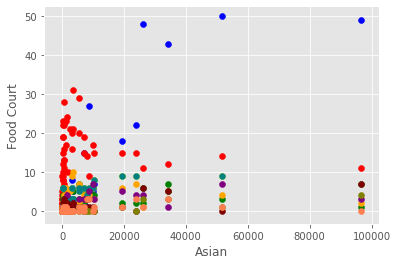

In [185]:
#plt.scatter(df_merged.ASIAN, df_merged['Indian Restaurant'],  cmap='viridis')
plt.scatter(df_merged.ASIAN, df_merged['Indian Restaurant'],  color='blue')
plt.scatter(df_merged.ASIAN, df_merged['Chinese Restaurant'],  color='red')
plt.scatter(df_merged.ASIAN, df_merged['Thai Restaurant'],  color='green')
plt.scatter(df_merged.ASIAN, df_merged['Sushi Restaurant'],  color='yellow')
plt.scatter(df_merged.ASIAN, df_merged['Japanese Restaurant'],  color='orange')
plt.scatter(df_merged.ASIAN, df_merged['Sushi Restaurant'],  color='teal')
plt.scatter(df_merged.ASIAN, df_merged['Vietnamese Restaurant'],  color='purple')
plt.scatter(df_merged.ASIAN, df_merged['Noodle House'],  color='maroon')
plt.scatter(df_merged.ASIAN, df_merged['Ramen Restaurant'],  color='olive')
plt.scatter(df_merged.ASIAN, df_merged['Korean Restaurant'],  color='coral')

plt.xlabel("Asian")
plt.ylabel("Food Court")
plt.show()

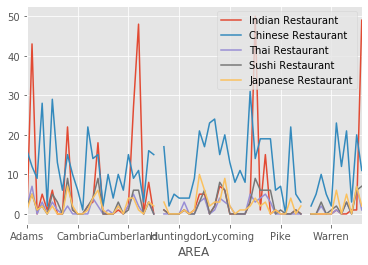

In [186]:
df_merged.plot(x="AREA", y=["Indian Restaurant", "Chinese Restaurant", "Thai Restaurant", "Sushi Restaurant", "Japanese Restaurant"])
plt.show(20,20)

In [187]:
# derive dataframe where the ASIAN POPULATION is lesser than 20000
df_merged_asia_bot20k = df_merged[df_merged['ASIAN'] < 20000]

df_merged_asia_bot20k

,ID,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,...,Soba Restaurant,Soup Place,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,42001,Adams,101407,94979,1561,213,746,20,2544,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0
2,2,42005,Armstrong,68941,67565,553,45,150,9,91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,42007,Beaver,170539,155561,10676,181,724,40,403,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0
4,4,42009,Bedford,49762,48782,238,75,101,14,151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,42011,Berks,411442,342148,20143,1285,5385,128,32101,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,61,42125,Washington,207820,195657,6757,251,1327,31,630,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
62,62,42127,Wayne,52822,49759,1644,101,255,4,460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,63,42129,Westmoreland,365169,348182,8562,351,2704,62,833,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,3.0,0.0,0.0
64,64,42131,Wyoming,28276,27545,208,54,95,3,112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
#### Plot top 5 asian restaurants where less than 20k ASIAN population

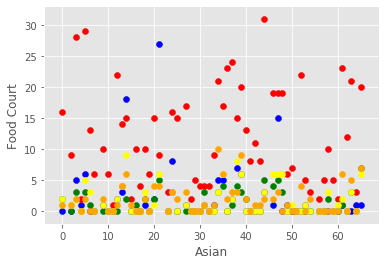

In [189]:
#plt.scatter(df_merged.ASIAN, df_merged['Indian Restaurant'],  cmap='viridis')
plt.scatter(df_merged_asia_bot20k.ID, df_merged_asia_bot20k['Indian Restaurant'],  color='blue')
plt.scatter(df_merged_asia_bot20k.ID, df_merged_asia_bot20k['Chinese Restaurant'],  color='red')
plt.scatter(df_merged_asia_bot20k.ID, df_merged_asia_bot20k['Thai Restaurant'],  color='green')
plt.scatter(df_merged_asia_bot20k.ID, df_merged_asia_bot20k['Sushi Restaurant'],  color='yellow')
plt.scatter(df_merged_asia_bot20k.ID, df_merged_asia_bot20k['Japanese Restaurant'],  color='orange')

plt.xlabel("Asian")
plt.ylabel("Food Court")
plt.show()

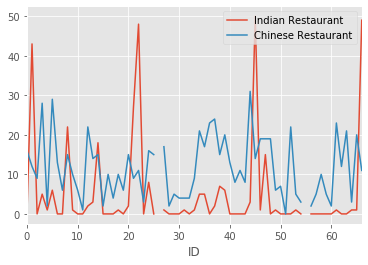

In [190]:
df_merged.plot(x="ID", y=["Indian Restaurant", "Chinese Restaurant"])
plt.show()

#### distribution of top 10 restaurants in pennsylvania county

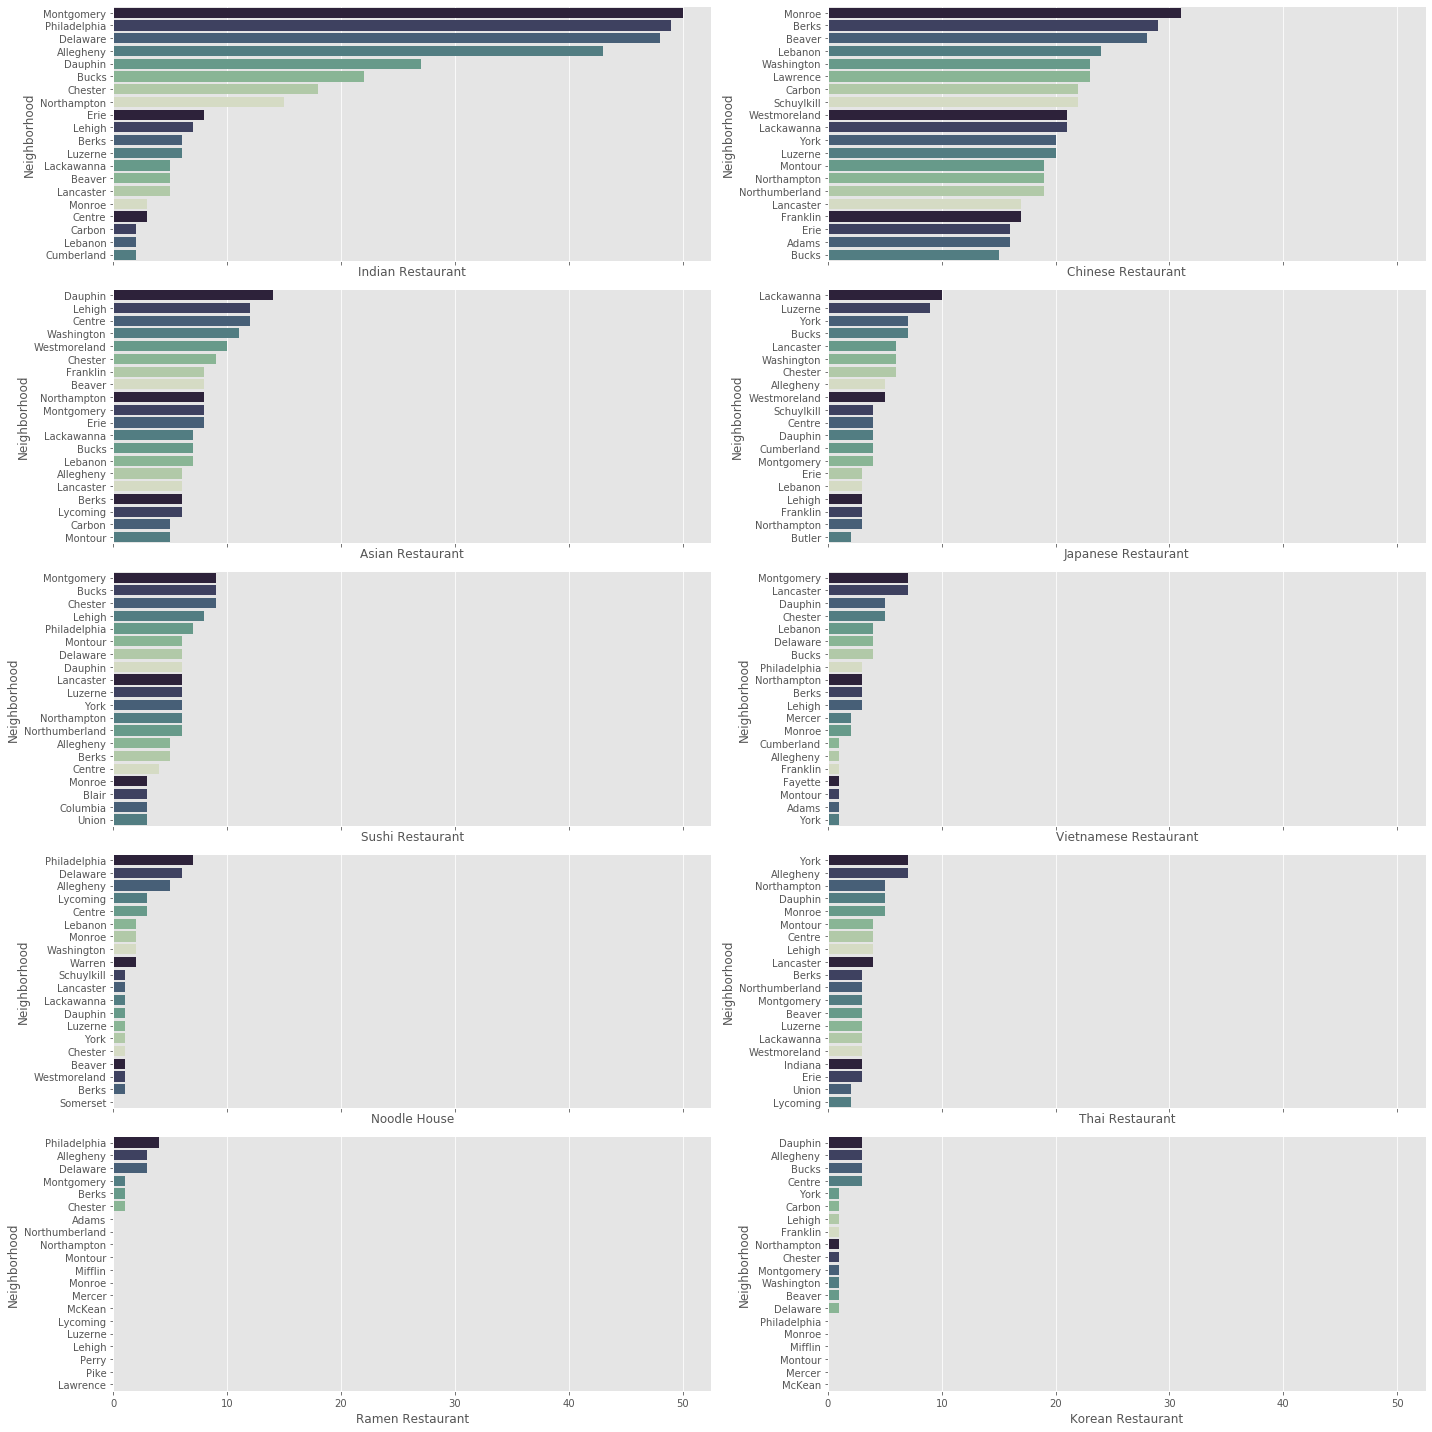

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top20_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:20]
    pal = sns.cubehelix_palette(8, start=.5, rot=-.75)

    
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
x=plt.show()
x

## 3. Analyze Each Neighborhood

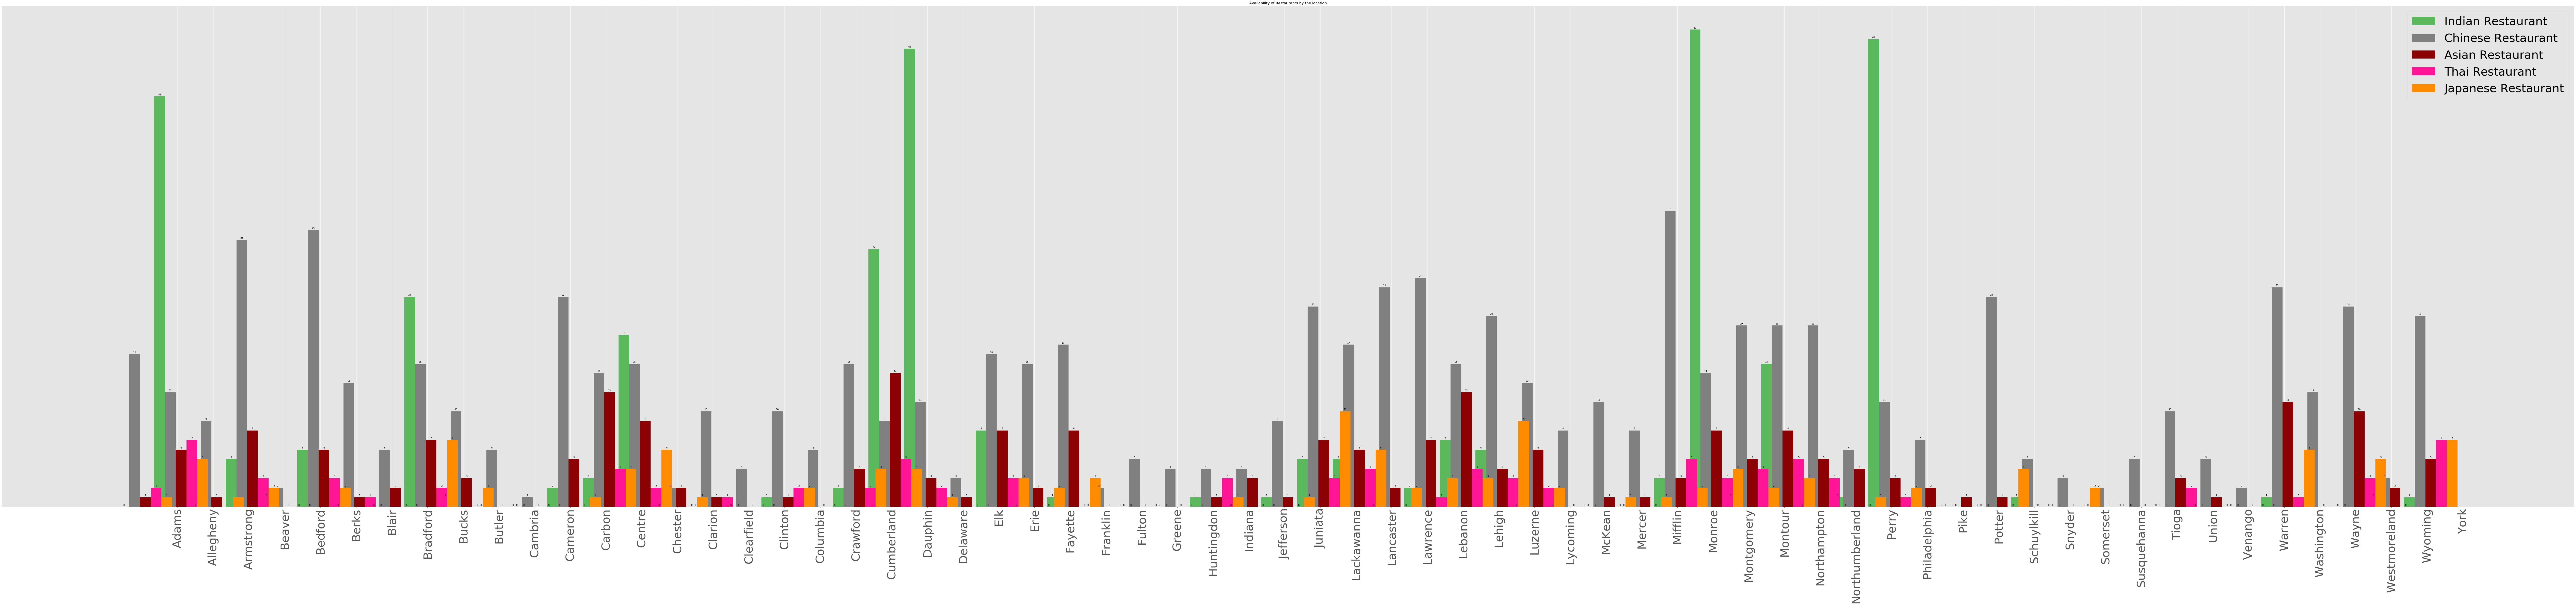

In [192]:
#Another way of reperesenting the presence of restaurants based on the neighborhood in group chat
Cities=venue_counts.index.tolist()
indx = np.arange(len(Cities))

bar_width = 0.3

indx = np.arange(len(Cities))
#
score_label = np.arange(0, 20, 2)
Indian_Restaurant=list(venue_counts['Indian Restaurant'])
Chinese_Restaurant=list(venue_counts['Chinese Restaurant'])
Asian_Restaurant=list(venue_counts['Asian Restaurant'])
Thai_Restaurant=list(venue_counts['Thai Restaurant'])
Japanese_Restaurant=list(venue_counts['Japanese Restaurant'])

#drawing the grouped bar chart
fig, ax = plt.subplots(figsize=(200, 40))

bar_Indian_Restaurant= ax.bar(indx-(bar_width*5), Indian_Restaurant, bar_width, label='Indian Restaurant',color='#5cb85c')
bar_Chinese_Restaurant= ax.bar(indx-(bar_width*4), Chinese_Restaurant, bar_width, label='Chinese Restaurant',color='#808080')
bar_Asian_Restaurant= ax.bar(indx-(bar_width*3), Asian_Restaurant, bar_width, label='Asian Restaurant',color='#8B0000')
bar_Thai_Restaurant= ax.bar(indx-(bar_width*2), Thai_Restaurant, bar_width, label='Thai Restaurant',color='#FF1493')
bar_Japanese_Restaurant= ax.bar(indx-(bar_width*1), Japanese_Restaurant, bar_width, label='Japanese Restaurant',color='#FF8C00')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(Cities,rotation=90,fontsize=50)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label,fontsize=50)

# inserting legend for the option - intrested, not intrested, very much intrested
ax.legend(fontsize=50)

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#write an function to set the lables for each category
def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )
#call the function to set the bar labels for each categoryS

insert_data_labels(bar_Indian_Restaurant)
insert_data_labels(bar_Chinese_Restaurant)
insert_data_labels(bar_Asian_Restaurant)
insert_data_labels(bar_Thai_Restaurant)
insert_data_labels(bar_Japanese_Restaurant)


#Remove the Y axis ticks universally
plt.yticks([])
#Provide the title for the graph.
plt.title("Availability of Restaurants by the location",fontsize=16)

plt.show()

In [254]:
PA_grouped.columns

Index(['Neighborhood', 'American Restaurant', 'Asian Restaurant', 'BBQ Joint',
       'Bar', 'Breakfast Spot', 'Buffet', 'Café', 'Cantonese Restaurant',
       'Chinese Restaurant', 'College Gym', 'Dim Sum Restaurant', 'Diner',
       'Event Space', 'Filipino Restaurant', 'Food Court', 'Food Truck',
       'Gourmet Shop', 'Grocery Store', 'Hookah Bar', 'Hunan Restaurant',
       'Indian Restaurant', 'Indonesian Restaurant', 'Italian Restaurant',
       'Japanese Restaurant', 'Karaoke Bar', 'Korean Restaurant',
       'Latin American Restaurant', 'Lounge', 'Malay Restaurant', 'Market',
       'Mediterranean Restaurant', 'Middle Eastern Restaurant',
       'Mongolian Restaurant', 'Noodle House', 'Poke Place',
       'Ramen Restaurant', 'Restaurant', 'Seafood Restaurant',
       'Shanghai Restaurant', 'Soba Restaurant', 'Soup Place', 'Supermarket',
       'Sushi Restaurant', 'Szechuan Restaurant', 'Taiwanese Restaurant',
       'Temple', 'Thai Restaurant', 'Vegetarian / Vegan Restaurant',

In [253]:
#PA_grouped = rest_onehot.groupby('Neighborhood').mean().reset_index()
PA_grouped = venue_counts.groupby('Neighborhood').mean().reset_index()

PA_grouped1 = PA_grouped
PA_grouped2 = PA_grouped
#PA_grouped2['TOTAL'] = PA_grouped2.sum(axis=1)
PA_grouped2.sum(axis=0)

Neighborhood                     AdamsAlleghenyArmstrongBeaverBedfordBerksBlair...
American Restaurant                                                              3
Asian Restaurant                                                               228
BBQ Joint                                                                        1
Bar                                                                              4
Breakfast Spot                                                                   2
Buffet                                                                           4
Café                                                                             1
Cantonese Restaurant                                                             2
Chinese Restaurant                                                             763
College Gym                                                                      2
Dim Sum Restaurant                                                              14
Dine

In [242]:
df_merged.columns

Index(['ID', 'FIPS', 'AREA', 'TOTAL POPULATION', 'WHITE', 'AFRICAN AMERICAN',
       'AMERICAN INDIAN AND ALASKA NATIVE', 'ASIAN',
       'NATIVE HAWAIIAN AND PACIFIC ISLANDER', 'OTHERS', 'TWO OR MORE RACES',
       'LONGITUDE', 'LATITUDE', 'American Restaurant', 'Asian Restaurant',
       'BBQ Joint', 'Bar', 'Breakfast Spot', 'Buffet', 'Café',
       'Cantonese Restaurant', 'Chinese Restaurant', 'College Gym',
       'Dim Sum Restaurant', 'Diner', 'Event Space', 'Filipino Restaurant',
       'Food Court', 'Food Truck', 'Gourmet Shop', 'Grocery Store',
       'Hookah Bar', 'Hunan Restaurant', 'Indian Restaurant',
       'Indonesian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Karaoke Bar', 'Korean Restaurant', 'Latin American Restaurant',
       'Lounge', 'Malay Restaurant', 'Market', 'Mediterranean Restaurant',
       'Middle Eastern Restaurant', 'Mongolian Restaurant', 'Noodle House',
       'Poke Place', 'Ramen Restaurant', 'Restaurant', 'Seafood Restaurant',
  

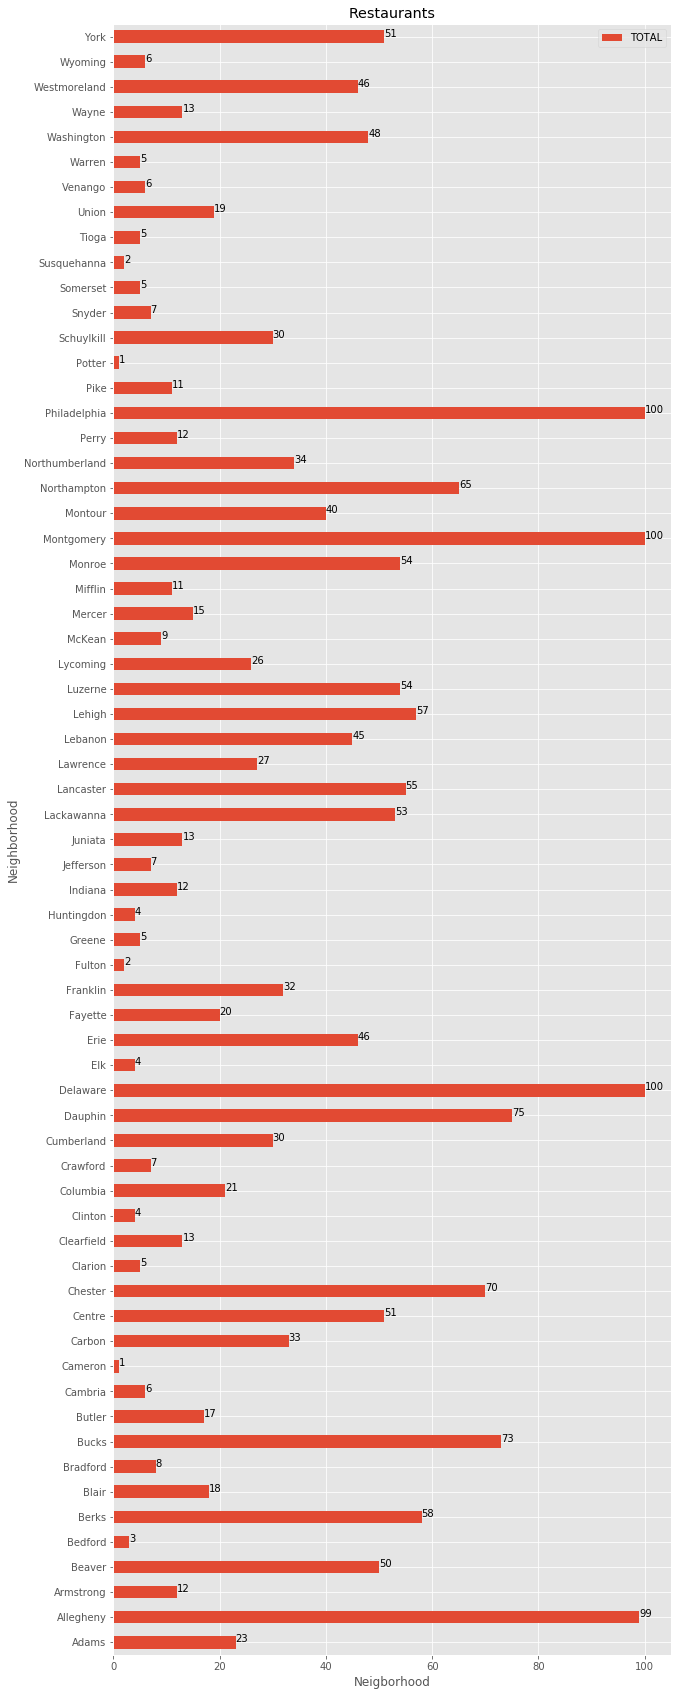

In [243]:
PA_grouped1 = PA_grouped
PA_grouped3 = PA_grouped
PA_grouped3['TOTAL'] = PA_grouped3.sum(axis=1)

# generate plot
PA_grouped3.plot(kind='barh', x='Neighborhood', y='TOTAL', figsize=(10,30))
plt.xlabel('Neigborhood')
plt.title('Restaurants')


for index, value in enumerate(PA_grouped3['TOTAL']):
    plt.text(value, index, str(value))
    
plt.show()

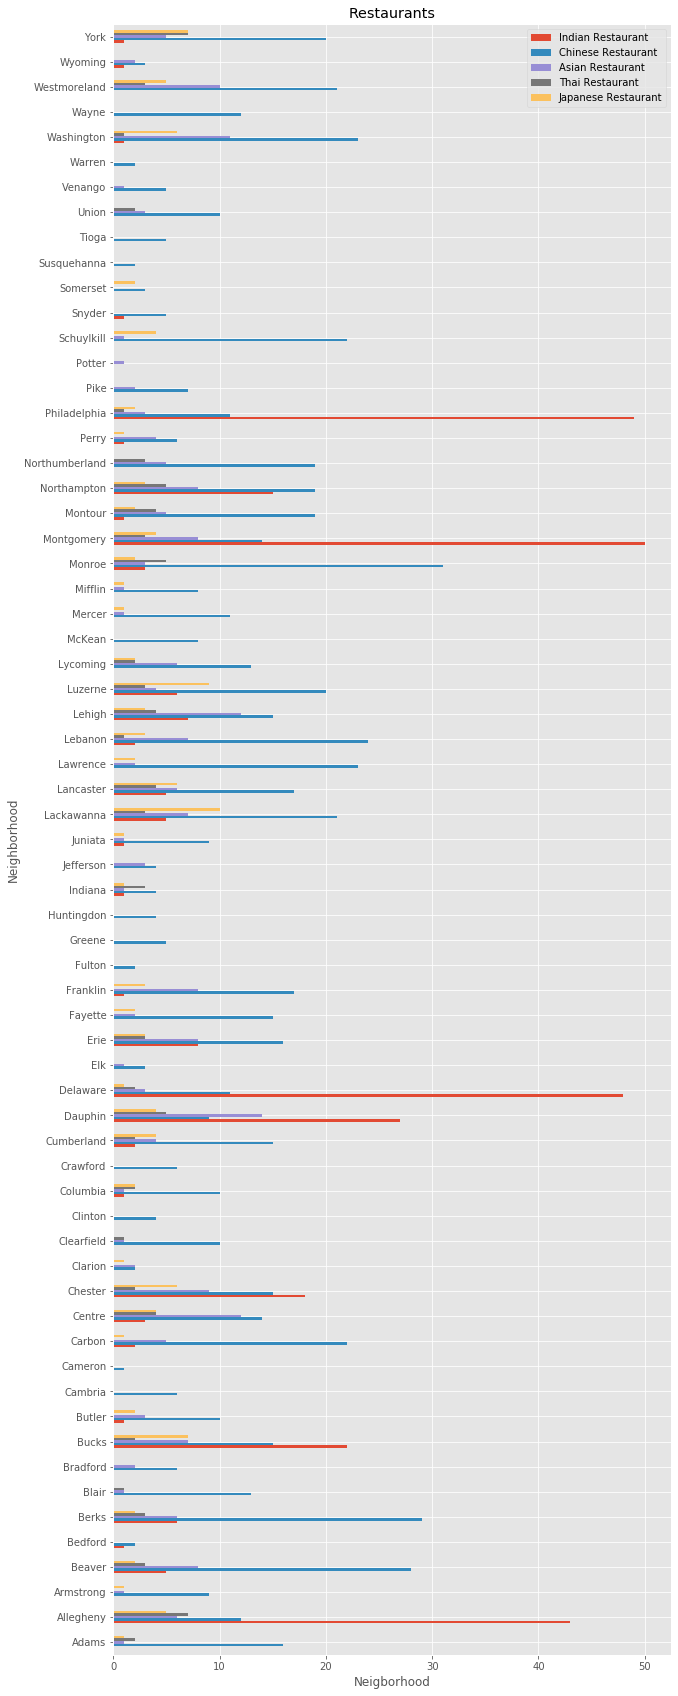

In [244]:
# generate plot
PA_grouped.plot(kind='barh', x='Neighborhood', y=['Indian Restaurant', 'Chinese Restaurant', 'Asian Restaurant', 'Thai Restaurant', 'Japanese Restaurant'], figsize=(10,30))
plt.xlabel('Neigborhood')
plt.title('Restaurants')

plt.show()

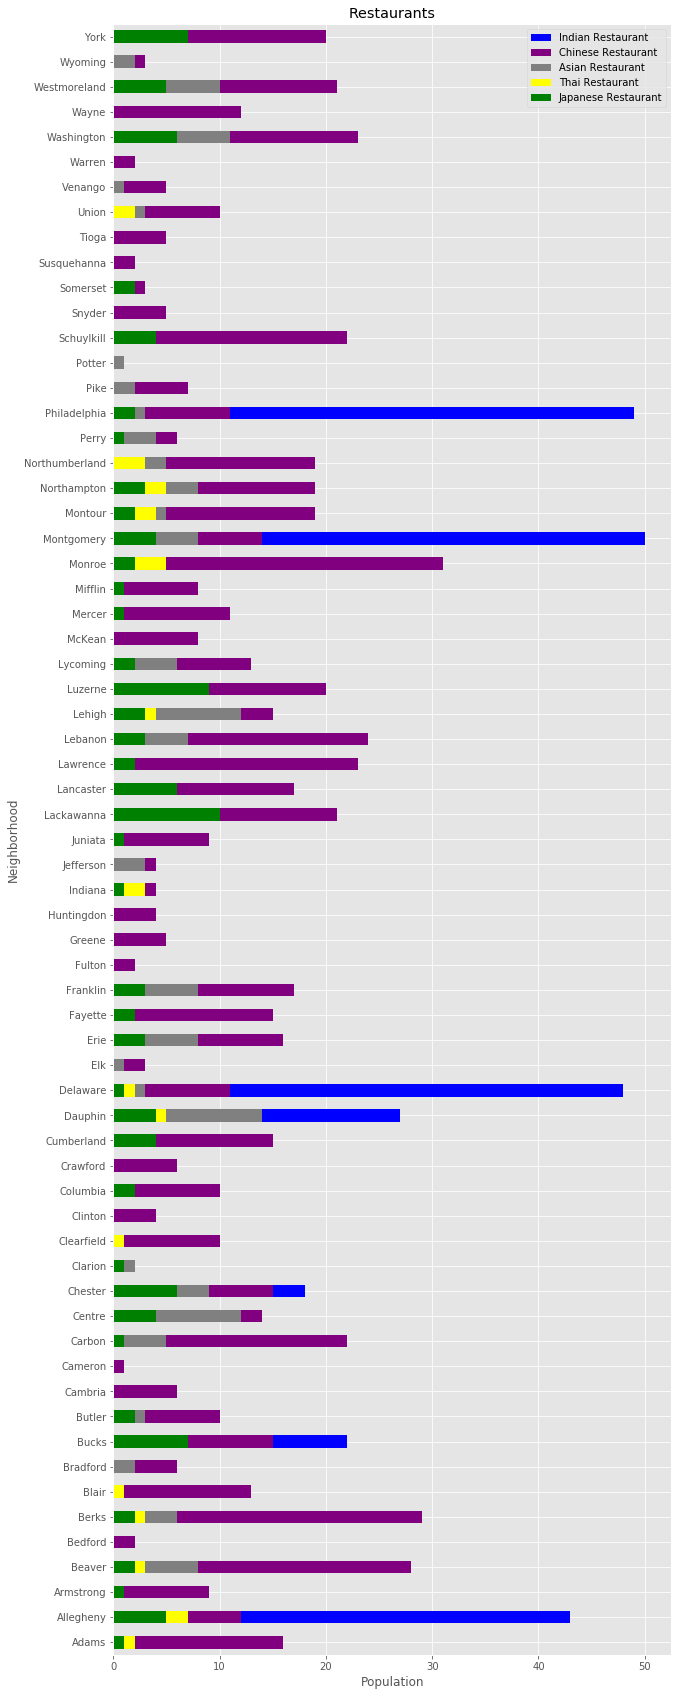

In [245]:
## generate plot
ax=PA_grouped.plot(kind='barh', x='Neighborhood', y='Indian Restaurant', figsize=(10, 30),color='blue')
PA_grouped.plot(kind='barh', x='Neighborhood', y='Chinese Restaurant', ax=ax, color='purple')
PA_grouped.plot(kind='barh', x='Neighborhood', y='Asian Restaurant', ax=ax, color='grey')
PA_grouped.plot(kind='barh', x='Neighborhood', y='Thai Restaurant', ax=ax, color='yellow')
PA_grouped.plot(kind='barh', x='Neighborhood', y='Japanese Restaurant',ax=ax, color='green')
plt.xlabel('Population')
plt.title('Restaurants')

plt.show()

### 

#### Let's print each neighborhood along with the top 5 most common venues

In [255]:
num_top_venues = 5

for hood in PA_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = PA_grouped[PA_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams----
                   venue  freq
0     Chinese Restaurant  16.0
1        Thai Restaurant   2.0
2       Sushi Restaurant   2.0
3  Vietnamese Restaurant   1.0
4       Asian Restaurant   1.0


----Allegheny----
                venue  freq
0   Indian Restaurant  43.0
1  Chinese Restaurant  12.0
2     Thai Restaurant   7.0
3    Asian Restaurant   6.0
4        Noodle House   5.0


----Armstrong----
                 venue  freq
0   Chinese Restaurant   9.0
1     Asian Restaurant   1.0
2  Japanese Restaurant   1.0
3     Sushi Restaurant   1.0
4  American Restaurant   0.0


----Beaver----
                 venue  freq
0   Chinese Restaurant  28.0
1     Asian Restaurant   8.0
2    Indian Restaurant   5.0
3      Thai Restaurant   3.0
4  Japanese Restaurant   2.0


----Bedford----
                 venue  freq
0   Chinese Restaurant   2.0
1    Indian Restaurant   1.0
2  American Restaurant   0.0
3   Seafood Restaurant   0.0
4     Malay Restaurant   0.0


----Berks----
                   

#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [256]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [257]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = PA_grouped['Neighborhood']

for ind in np.arange(PA_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(PA_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Bar,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant
1,Allegheny,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Noodle House,Ramen Restaurant,Korean Restaurant,Food Truck
2,Armstrong,Chinese Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar
3,Beaver,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Korean Restaurant,Noodle House,Event Space,Hunan Restaurant
4,Bedford,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
...,...,...,...,...,...,...,...,...,...,...,...
60,Washington,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Noodle House,Indian Restaurant,Thai Restaurant,Korean Restaurant,Food Court,Event Space
61,Wayne,Chinese Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
62,Westmoreland,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Thai Restaurant,Sushi Restaurant,Breakfast Spot,Noodle House,Mongolian Restaurant,Szechuan Restaurant,Event Space
63,Wyoming,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop


In [258]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

## 4. Cluster Neighborhoods
Run *k*-means to cluster the neighborhood into 5 clusters.

In [259]:
# set number of clusters
kclusters = 5

PA_grouped_clustering = PA_grouped.drop('Neighborhood', 1)


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(PA_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 0, 2, 4, 2, 0, 4, 3, 0], dtype=int32)

In [260]:
PA_grouped_clustering


,American Restaurant,Asian Restaurant,BBQ Joint,Bar,Breakfast Spot,Buffet,Café,Cantonese Restaurant,Chinese Restaurant,College Gym,...,Soba Restaurant,Soup Place,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Temple,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0,1,0,0,0,0,0,0,16,0,...,0,0,0,2,0,0,0,2,0,1
1,0,6,0,0,0,0,1,0,12,0,...,0,0,0,5,1,1,0,7,0,1
2,0,1,0,0,0,0,0,0,9,0,...,0,0,0,1,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,28,0,...,0,0,0,2,0,0,0,3,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,11,0,0,0,0,0,0,23,0,...,0,0,0,2,0,0,0,1,0,0
61,0,0,0,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
62,0,10,0,0,1,0,0,0,21,0,...,0,0,0,3,1,0,0,3,0,0
63,0,2,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [262]:
PA_merged1 = df_PA
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
PA_merged1 = PA_merged1.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='AREA')

PA_merged1.head() # check the last columns!

,ID,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,42001,Adams,101407,94979,1561,213,746,20,2544,...,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Bar,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant
1,1,42003,Allegheny,1223348,997295,161861,1702,34090,278,5523,...,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Noodle House,Ramen Restaurant,Korean Restaurant,Food Truck
2,2,42005,Armstrong,68941,67565,553,45,150,9,91,...,Chinese Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar
3,3,42007,Beaver,170539,155561,10676,181,724,40,403,...,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Korean Restaurant,Noodle House,Event Space,Hunan Restaurant
4,4,42009,Bedford,49762,48782,238,75,101,14,151,...,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck


In [263]:
PA_merged1['Cluster Labels'].unique()

array([ 0.,  1.,  2.,  4.,  3., nan])

In [264]:
PA_merged1['Cluster Labels']
PA_merged1['Cluster Labels'] = PA_merged1['Cluster Labels'].fillna(0).astype(int)

In [265]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [266]:
# Assign PA json file downloaded from https://www.pasda.psu.edu/

PA_geo = r'PaCounty.json' # geojson file

# Assign PA latitudes and longitudes

latitude = 41.20
longitude = -77.19

# create a plain PA map
PA_map1 = folium.Map(location=[latitude, longitude], zoom_start=7)

# generate choropleth map using the total ASIAN population of each county in Pennsylvania
PA_map1.choropleth(
    geo_data=PA_geo,
    data=df_PA, 
    columns=['ID', 'ASIAN'],
    key_on='id',
#    fill_color='YlOrRd', 
#    fill_color='RdYlGn',
    fill_color='BuPu',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='PA population'
)

# save map

PA_map1.save(outfile= "test5.html")

# display HTML map

from IPython.display import HTML
HTML('<iframe src=test5.html width=700 height=450></iframe>')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [267]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)
#restaurants = folium.map.FeatureGroup()

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(PA_merged1['LATITUDE'], PA_merged1['LONGITUDE'], PA_merged1['AREA'], PA_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
#        fill_opacity=0.7).add_to(restaurants)

map_clusters.save(outfile= "test5.html")

# display HTML map

from IPython.display import HTML
HTML('<IFrame src=test5.html width=700 height=450></iframe>')

## 5. Examine Clusters
#### Cluster 1

In [268]:
PA_merged1.loc[PA_merged1['Cluster Labels'] == 0, PA_merged1.columns[[1] + list(range(2, PA_merged1.shape[1]))]]

,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,42001,Adams,101407,94979,1561,213,746,20,2544,1344,...,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Japanese Restaurant,Asian Restaurant,Bar,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant
2,42005,Armstrong,68941,67565,553,45,150,9,91,528,...,Chinese Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar
6,42013,Blair,127089,122238,2129,143,706,29,297,1547,...,Chinese Restaurant,Sushi Restaurant,Thai Restaurant,Asian Restaurant,Vietnamese Restaurant,Event Space,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store
9,42019,Butler,183862,177605,2021,194,1838,50,462,1692,...,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Hunan Restaurant,Hookah Bar
16,42033,Clearfield,81642,77912,1862,86,389,16,652,725,...,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Food Court,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar
18,42037,Columbia,67295,64227,1246,87,563,15,450,707,...,Chinese Restaurant,Sushi Restaurant,Japanese Restaurant,Thai Restaurant,Indian Restaurant,Italian Restaurant,Vietnamese Restaurant,Asian Restaurant,Breakfast Spot,Food Court
20,42041,Cumberland,235406,213934,7527,363,7072,65,2203,4242,...,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Thai Restaurant,Indian Restaurant,Soup Place,Vietnamese Restaurant,Sushi Restaurant,Breakfast Spot,Filipino Restaurant
25,42051,Fayette,136606,127418,6325,184,405,24,411,1839,...,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store
26,42053,Forest,7716,5937,1389,13,12,1,318,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,42067,Juniata,24636,23845,151,31,85,3,279,242,...,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Szechuan Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Hunan Restaurant,Hookah Bar


#### Cluster 2

In [269]:
PA_merged1.loc[PA_merged1['Cluster Labels'] == 1, PA_merged1.columns[[1] + list(range(2, PA_merged1.shape[1]))]]

,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,42003,Allegheny,1223348,997295,161861,1702,34090,278,5523,22599,...,Indian Restaurant,Chinese Restaurant,Thai Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Noodle House,Ramen Restaurant,Korean Restaurant,Food Truck
22,42045,Delaware,558979,405233,110260,874,26277,145,5211,10979,...,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Noodle House,Vietnamese Restaurant,Ramen Restaurant,Dim Sum Restaurant,Asian Restaurant,Bar,Taiwanese Restaurant
45,42091,Montgomery,799874,649021,69351,1174,51565,296,12947,15520,...,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Asian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Thai Restaurant,Dim Sum Restaurant,Supermarket,Korean Restaurant
66,42101,Philadelphia,1526006,626221,661839,6996,96405,744,90731,43070,...,Indian Restaurant,Chinese Restaurant,Noodle House,Sushi Restaurant,Ramen Restaurant,Vietnamese Restaurant,Asian Restaurant,Dim Sum Restaurant,Bar,Taiwanese Restaurant


#### Cluster 3

In [270]:
PA_merged1.loc[PA_merged1['Cluster Labels'] == 2, PA_merged1.columns[[1] + list(range(2, PA_merged1.shape[1]))]]

,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,42007,Beaver,170539,155561,10676,181,724,40,403,2954,...,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Korean Restaurant,Noodle House,Event Space,Hunan Restaurant
5,42011,Berks,411442,342148,20143,1285,5385,128,32101,10252,...,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Sushi Restaurant,Vietnamese Restaurant,Thai Restaurant,Japanese Restaurant,Italian Restaurant,Noodle House,Mediterranean Restaurant
12,42025,Carbon,65249,62519,976,123,311,27,504,789,...,Chinese Restaurant,Asian Restaurant,Indian Restaurant,Sushi Restaurant,Japanese Restaurant,Korean Restaurant,Filipino Restaurant,Indonesian Restaurant,Hunan Restaurant,Hookah Bar
13,42027,Centre,153990,137625,4638,191,7986,48,1142,2360,...,Chinese Restaurant,Asian Restaurant,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Korean Restaurant,Noodle House,Indian Restaurant,Szechuan Restaurant,Shanghai Restaurant
24,42049,Erie,280566,247569,20155,566,3077,90,3231,5878,...,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Buffet,Latin American Restaurant,Poke Place,Dim Sum Restaurant
27,42055,Franklin,149618,137674,4700,302,1310,29,2849,2754,...,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Sushi Restaurant,Korean Restaurant,Indian Restaurant,Vietnamese Restaurant,Buffet,Food Truck,Indonesian Restaurant
34,42069,Lackawanna,214437,197296,5423,330,3644,55,4393,3296,...,Chinese Restaurant,Japanese Restaurant,Asian Restaurant,Indian Restaurant,Thai Restaurant,Sushi Restaurant,Noodle House,Dim Sum Restaurant,Restaurant,College Gym
35,42071,Lancaster,519445,460171,19035,1195,9860,164,18819,10201,...,Chinese Restaurant,Vietnamese Restaurant,Asian Restaurant,Sushi Restaurant,Japanese Restaurant,Indian Restaurant,Thai Restaurant,Seafood Restaurant,Noodle House,American Restaurant
36,42073,Lawrence,91108,85484,3501,74,370,10,196,1473,...,Chinese Restaurant,Asian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store
37,42075,Lebanon,133568,121566,2885,250,1533,36,5165,2133,...,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Noodle House,Sushi Restaurant,Indian Restaurant,Thai Restaurant,Event Space,Hunan Restaurant


#### cluster 4

In [271]:
PA_merged1.loc[PA_merged1['Cluster Labels'] == 3, PA_merged1.columns[[1] + list(range(2, PA_merged1.shape[1]))]]

,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,42017,Bucks,625249,557647,22376,1232,24008,174,9430,10382,...,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Asian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Korean Restaurant,Thai Restaurant,Supermarket,BBQ Joint
14,42029,Chester,498886,426707,30623,862,19296,161,12207,9030,...,Indian Restaurant,Chinese Restaurant,Sushi Restaurant,Asian Restaurant,Japanese Restaurant,Vietnamese Restaurant,Thai Restaurant,Szechuan Restaurant,Market,Grocery Store
21,42043,Dauphin,268100,194910,48386,578,8580,78,7284,8284,...,Indian Restaurant,Asian Restaurant,Chinese Restaurant,Sushi Restaurant,Vietnamese Restaurant,Thai Restaurant,Japanese Restaurant,Korean Restaurant,Noodle House,Soba Restaurant
47,42095,Northampton,297735,256895,14986,609,7203,98,11289,6655,...,Chinese Restaurant,Indian Restaurant,Asian Restaurant,Sushi Restaurant,Thai Restaurant,Vietnamese Restaurant,Japanese Restaurant,Malay Restaurant,Cantonese Restaurant,Dim Sum Restaurant


#### cluster 5

In [272]:
PA_merged1.loc[PA_merged1['Cluster Labels'] == 4, PA_merged1.columns[[1] + list(range(2, PA_merged1.shape[1]))]]

,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,TWO OR MORE RACES,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,42009,Bedford,49762,48782,238,75,101,14,151,401,...,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
7,42015,Bradford,62622,61035,311,154,339,7,130,646,...,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
10,42021,Cambria,143679,135206,5222,147,729,29,588,1758,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
11,42023,Cameron,5085,5000,13,13,14,0,3,42,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
15,42031,Clarion,39988,38873,484,58,191,8,59,315,...,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store
17,42035,Clinton,39238,37860,625,34,200,15,171,333,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
19,42039,Crawford,88765,85448,1547,162,403,19,170,1016,...,Chinese Restaurant,Buffet,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
23,42047,Elk,31946,31469,89,34,96,6,42,210,...,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
28,42057,Fulton,14845,14450,151,28,19,1,42,154,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
29,42059,Greene,38686,36584,1282,67,113,7,258,375,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck


In [273]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Wordcloud is installed and imported!


In [274]:
stopwords = set(STOPWORDS)

In [275]:
PA_merged1[PA_merged1['Cluster Labels'] == 4]

,ID,FIPS,AREA,TOTAL POPULATION,WHITE,AFRICAN AMERICAN,AMERICAN INDIAN AND ALASKA NATIVE,ASIAN,NATIVE HAWAIIAN AND PACIFIC ISLANDER,OTHERS,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,4,42009,Bedford,49762,48782,238,75,101,14,151,...,Chinese Restaurant,Indian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
7,7,42015,Bradford,62622,61035,311,154,339,7,130,...,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
10,10,42021,Cambria,143679,135206,5222,147,729,29,588,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
11,11,42023,Cameron,5085,5000,13,13,14,0,3,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
15,15,42031,Clarion,39988,38873,484,58,191,8,59,...,Asian Restaurant,Chinese Restaurant,Japanese Restaurant,Vietnamese Restaurant,Filipino Restaurant,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store
17,17,42035,Clinton,39238,37860,625,34,200,15,171,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
19,19,42039,Crawford,88765,85448,1547,162,403,19,170,...,Chinese Restaurant,Buffet,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
23,23,42047,Elk,31946,31469,89,34,96,6,42,...,Chinese Restaurant,Asian Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop
28,28,42057,Fulton,14845,14450,151,28,19,1,42,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck
29,29,42059,Greene,38686,36584,1282,67,113,7,258,...,Chinese Restaurant,Vietnamese Restaurant,Event Space,Indonesian Restaurant,Indian Restaurant,Hunan Restaurant,Hookah Bar,Grocery Store,Gourmet Shop,Food Truck


In [276]:
PA_merged1_c1str = PA_merged1[PA_merged1['Cluster Labels'] == 5].to_string()
PA_merged1_c1str = PA_merged1.to_string()

In [277]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=1000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(PA_merged1_c1str)

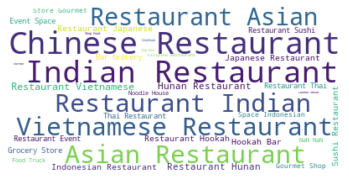

In [278]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Insights